In [1]:
#HRDC Feedback Form Data Analysis & Visualization

#Libreary Import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import csv file
feedback_sheet = pd.read_csv(r"C:\Users\abc\Desktop\feedback\feedback.csv")

C:\Users\abc\AppData\Local\Temp\ipykernel_6336\3484125438.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d = c.replace("2 (Ineffective)",2)
C:\Users\abc\AppData\Local\Temp\ipykernel_6336\3484125438.py:56: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  b = a.replace("4 (Good)",4)
C:\Users\abc\AppData\Local\Temp\ipykernel_6336\3484125438.py:57: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To

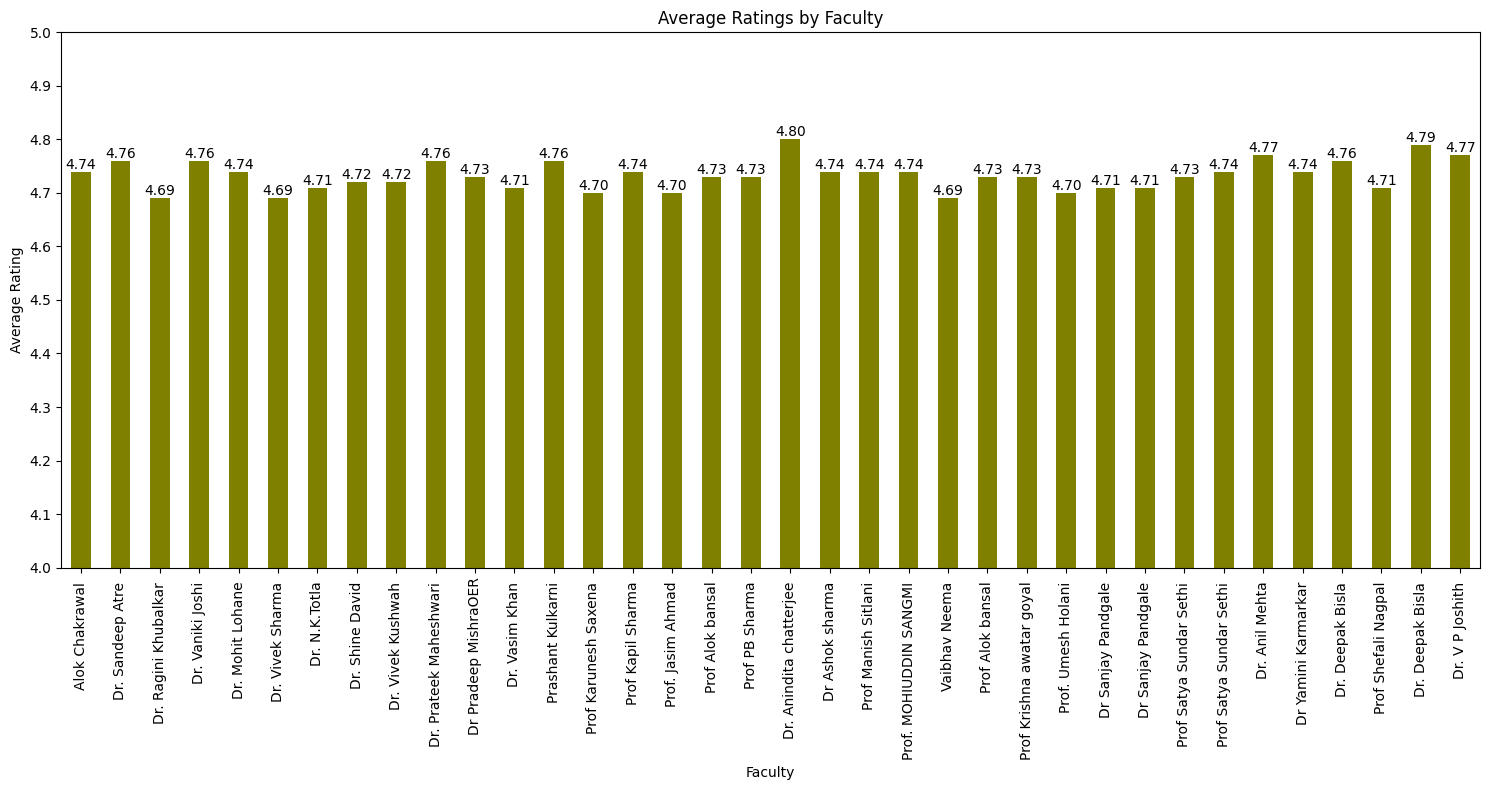

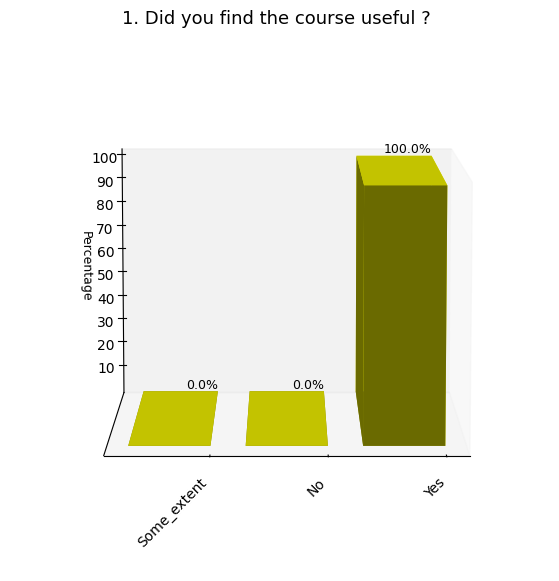

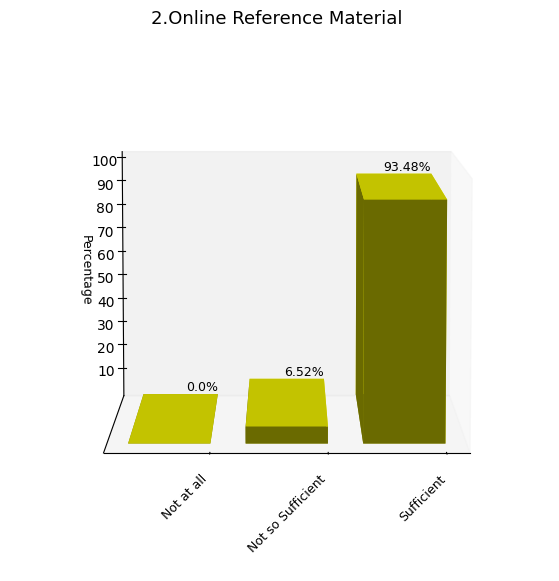

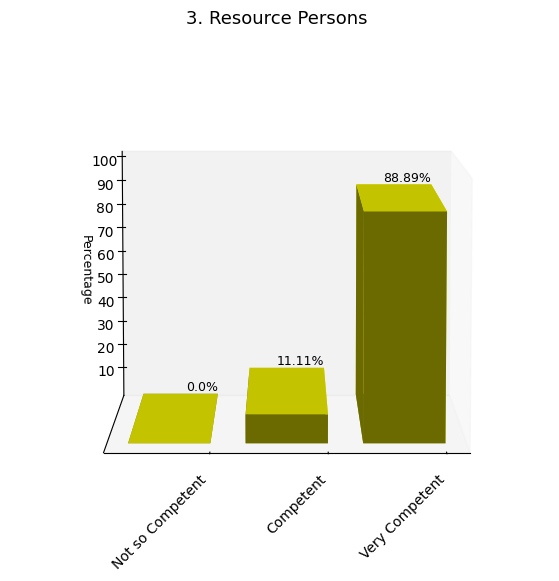

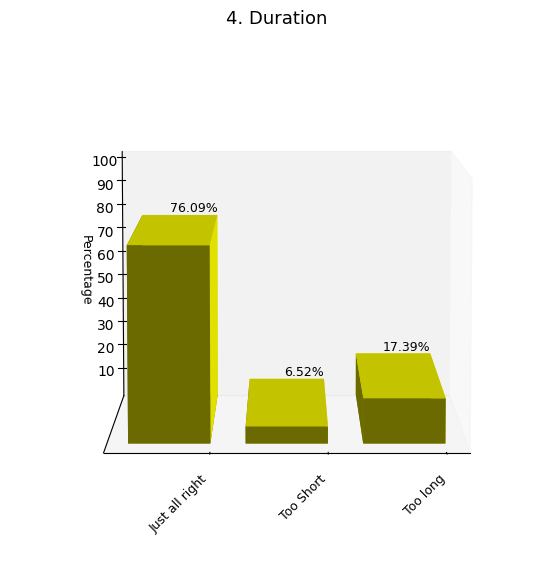

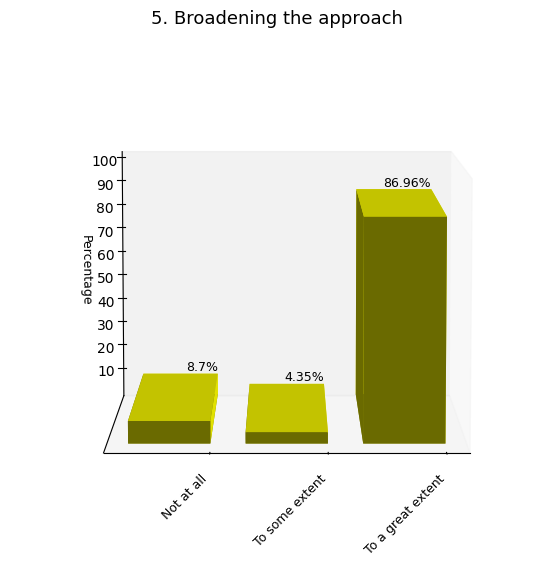

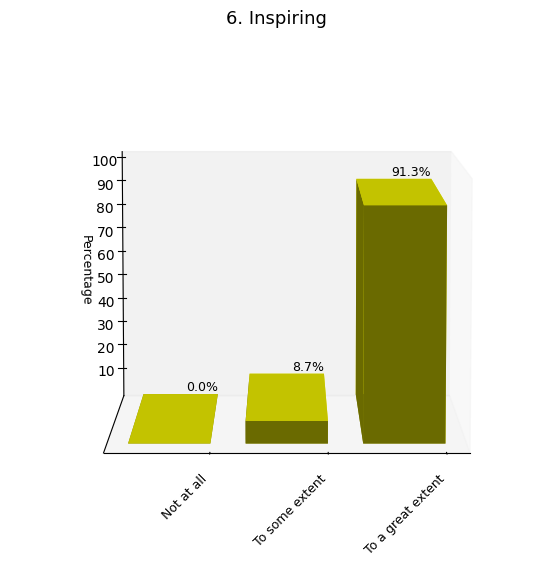

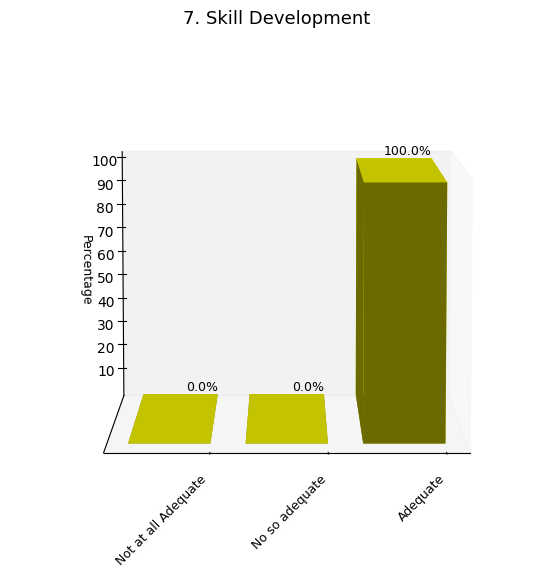

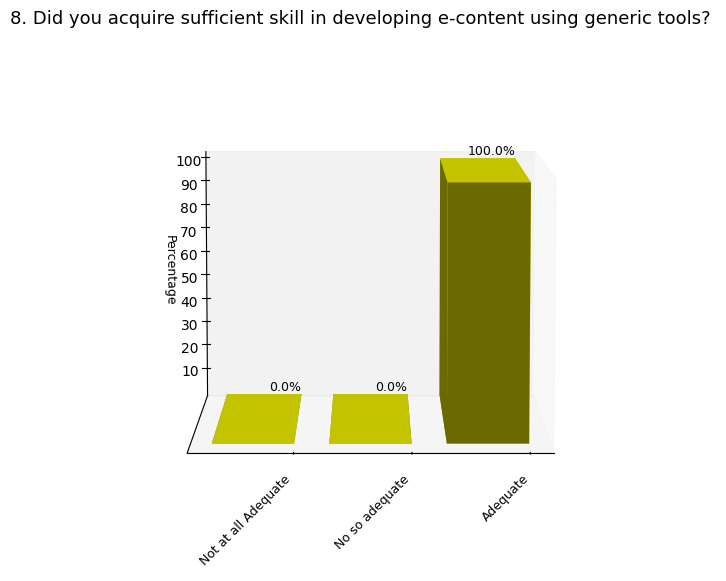

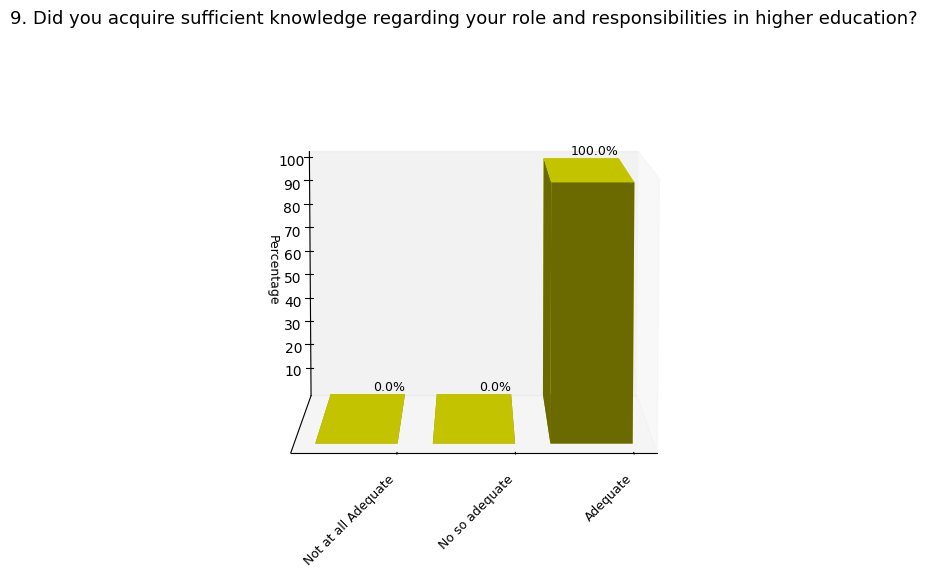

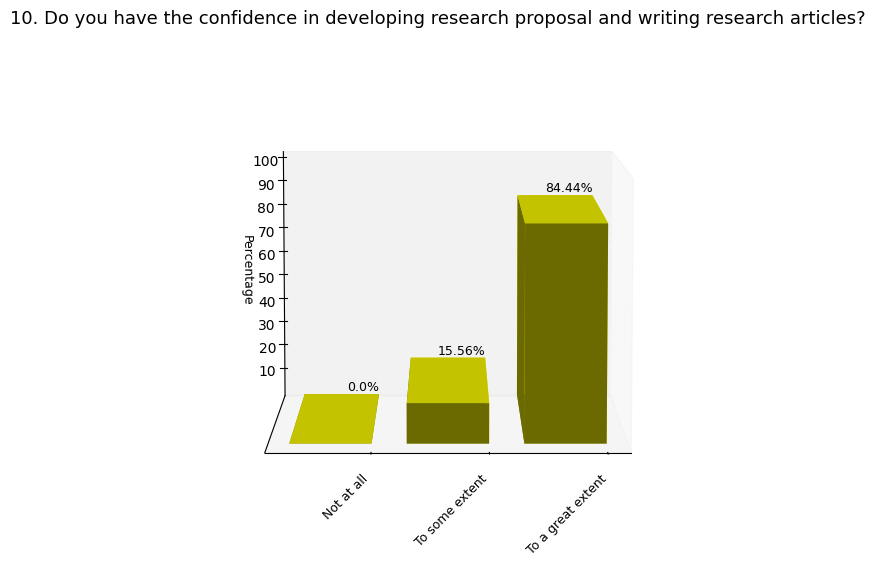

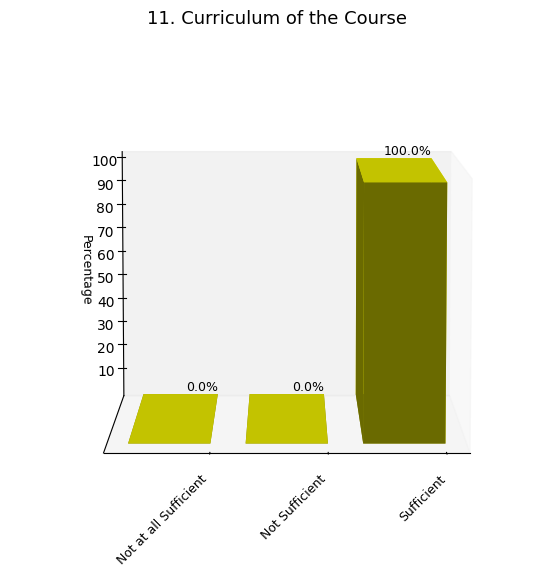

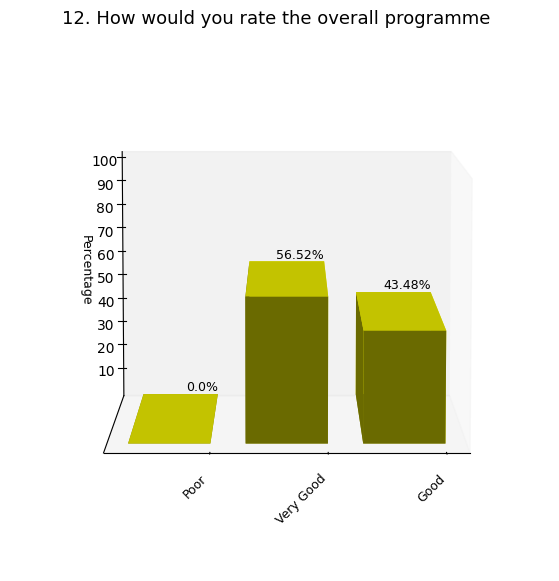

In [2]:



#print csv file
#feedback_sheet

# Total response count
total_response = len(feedback_sheet.index)

#total_response

#---------------**------------------


# Communication skill chunk

communication_to_match = "Communication Skill"
chunk_communication = feedback_sheet.filter(like=communication_to_match)

#chunk_communication qualitative data convert quantitative data

a = chunk_communication.replace("5 (Very effective)",5)
b = a.replace("4 (Effective)",4)
c = b.replace("3 (Satisfactory)",3)
d = c.replace("2 (Ineffective)",2)
e = d.replace("1 (Netural)",1)

# store variable
communication_data = e

# row and column exchange - > (Transpose)
communication_res = communication_data.transpose()

communication_sum = communication_res.sum(axis=1)



#communication_sum

#feedback_sheet
#chunk_communication
#communication_data
#communication_res


#------------------**----------------------




# Quality of lecture

quality_to_match = "Quality of lecture"
chunk_quality = feedback_sheet.filter(like=quality_to_match)

#chunk_communication qualitative data convert quantitative data

a = chunk_quality.replace("5 (Very Good)",5)
b = a.replace("4 (Good)",4)
c = b.replace("3 (Satisfactory)",3)
d = c.replace("2 (Ineffective)",2)
e = d.replace("1 (Netural)",1)

# store variable
quality_clean_data = e

# row and column exchange - > (Transpose)
quality_transpose = quality_clean_data.transpose()

quality_sum = quality_transpose.sum(axis=1)

#quality_sum



#----------------------**----------------



# Competency in Subject

competency_to_match = "Competency in Subject"
chunk_compentency = feedback_sheet.filter(like=competency_to_match)

#chunk_compentency qualitative data convert quantitative data


#chunk_compentency

a = chunk_compentency.replace("5 (Very Competent)",5)
b = a.replace("4 (Competent)",4)
c = b.replace("3 (Satisfactory)",3)
d = c.replace("2 (Ineffective)",2)
e = d.replace("1 (Netural)",1)



# store variable
compentency_clean_data = e

# row and column exchange - > (Transpose)
compentency_transpose = compentency_clean_data.transpose()

compentency_sum = compentency_transpose.sum(axis=1)

#compentency_sum


#---------------------**-------------------------



# Usefulness of Topic/s

usefulness_to_match = "Usefulness of Topic/s"
chunk_usefulness = feedback_sheet.filter(like=usefulness_to_match)

#chunk_Usefulness of Topic/s qualitative data convert quantitative data


a = chunk_usefulness.replace("5 (Very Useful)",5)
b = a.replace("4 (Useful)",4)
c = b.replace("3 (Satisfactory)",3)
d = c.replace("2 (Not Useful)",2)
e = d.replace("1 (Netural)",1)



# store variable
usefulness_clean_data = e

# row and column exchange - > (Transpose)
usefulness_transpose = usefulness_clean_data.transpose()

usefulness_sum = usefulness_transpose.sum(axis=1)

type(usefulness_sum)

#usefulness_sum



#--------------------**-----------------------



#feedback_sheet

type(usefulness_sum)
chunk_compentency
chunk_communication

mylist = []
for i in chunk_communication:
    mylist.append(i)

df = pd.Series(mylist)

faculty_data = pd.DataFrame({"Faculty_text":df})

faculty_data.head()

# #faculty.Faculty_text.str.extract(r'\[(.*?)\(')
faculty = faculty_data.Faculty_text.str.extract(r"\[(.*?)\(")  

faculty_name = []
for i in faculty[0]:
    faculty_name.append(i)

faculty_name[10] = "Dr Pradeep MishraOER"



#-------------------------**-----------------------


#list convert

communication_list = communication_sum.values.tolist()
quality_list = quality_sum.values.tolist()
competency_list = compentency_sum.values.tolist()
usefulness_list = usefulness_sum.values.tolist()
#faculty_name




#DataFrame convert in 4 column  1.Communication	2.Quality	3.Competency	4.Usefulness 

feedback_dataframe = pd.DataFrame({"faculty_name":faculty_name,"Communication":communication_list,"Quality":quality_list,"Competency":competency_list,"Usefulness":usefulness_list})

#feedback_dataframe


#------------------------**--------------------------




# total sum in 1.Communication	2.Quality	3.Competency	4.Usefulness  column 
feedback_total_all = feedback_dataframe.set_index("faculty_name")[['Communication', 'Quality', 'Competency', 'Usefulness']].sum(axis=1)


# calculate average rating  
feedback = feedback_dataframe.set_index("faculty_name")[['Communication', 'Quality', 'Competency', 'Usefulness']].sum(axis=1)/total_response/4
feedback = round(feedback, 2)



#--------------------**------------------------------




# feedback_total_all and feedback average rating and faculy name all column show and excel file export
 
total_all = []
for i in feedback_total_all:
    total_all.append(i)
#print(total_all)

# average rating variable store
feedback_rating = feedback

#feedback_rating

total_rating = []
for i in feedback_rating:
    total_rating.append(i)
#print(total_rating)

fac_tot_rat = total_rating

total_score = pd.DataFrame({"feedback_total":total_all,"total_rating":total_rating})


#feedback_dataframe
#total_score

#total_rating

feedback_final_score = pd.concat([feedback_dataframe, total_score], axis=1)

#Feedback final excel file export
#feedback_final_score.to_excel("feedback_final_score.xlsx")



#feedback_final_score




#---------------------------**-------------------------



# Faculty Rating final bar graph show


plt.figure(figsize=(15, 8))
bars = feedback.plot(kind='bar', color = "olive")
plt.title('Average Ratings by Faculty')
plt.xlabel('Faculty')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.yticks([1, 2, 3, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0])

# Set the lower limit of the y-axis to 4
plt.ylim(4, 5)



# Adding data labels
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), 
                 ha='center', va='center',
                 xytext=(0, 5), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()


#------------------------**--------------------------



# Import 13 Ques
# 1. Did you find the course useful ?
# 2. Online Reference Material
# 3. Resource Persons
# 4. Duration
# 5. Broadening the approach
# 6. Inspiring
# 7. Skill Development
# 8. Did you acquire sufficient skill in developing e-content using generic tools?
# 9. Did you acquire sufficient knowledge regarding your role and responsibilities in higher education?
# 10. Do you have the confidence in developing research proposal and writing research articles?
# 11. Curriculum of the Course
# 12. How would you rate the overall programme














# 1. Did you find the course useful ?

course_useful = "Did you find the course useful ?"
course_useful_res = feedback_sheet.filter(like=course_useful)

course_res = course_useful_res.values.tolist()

# Merge onlion_res all list in one list
course_list = []
for sublist in course_res:
    course_list.extend(sublist)

# onlion res merge
Yes = 0
No = 0
Some_extent = 0

for i in course_list:
    if i == "Yes":
         Yes = Yes + 1
    if i == "No":
        No = No + 1
    if Some_extent == "Some extent":
        Some_extent = Some_extent + 1

total_cat = Yes + No + Some_extent


# Category data percentage show

Yes = round((Yes*100)/total_cat, 2)
No = round((No*100)/total_cat, 2)
Some_extent = round((Some_extent*100)/total_cat, 2)

# Prepare data for 3D bar graph
categories = ["Yes", "No", "Some_extent"]
values = [Yes, No, Some_extent]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Position of bars on x-axis
xpos = np.arange(len(categories))
ypos = np.zeros(len(categories))  # y positions are all zero for a 2D bar graph
zpos = np.zeros(len(categories))

# The width and depth of the bars
dx = np.ones(len(categories)) * 0.7  # Width of the bars
dy = np.ones(len(categories))  # Depth of the bars
dz = values

# Plot bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='yellow')

# Labeling the x-axis
ax.set_xticks(xpos)
#ax.set_xticklabels(categories)
ax.set_xticklabels(categories, fontsize=10, rotation=45, ha='right')

# Labeling axes
#ax.set_xlabel('Category')
#ax.set_ylabel('Y')
ax.set_zlabel('Percentage', fontsize= 9)

#Title set
ax.set_title("1. Did you find the course useful ? ", fontsize= 13)

# Remove y-ticks
ax.set_yticks([])
ax.set_zticks([10,20,30,40,50,60,70,80,90,100])


# grid line remove
ax.grid(False)

# Set the viewing angle to 90 degrees
ax.view_init(elev=8, azim=90)

# Add value labels on top of bars
for i in range(len(categories)):
    ax.text(xpos[i], ypos[i], dz[i], f'{dz[i]}%', ha='right', va='bottom', fontsize=9)

# Show the graph
plt.show()



#-----------------------**---------------------------




# 2.Online Reference Material

onlion_ref_mat = "Online Reference Material"
onlion_res_mat_chunk = feedback_sheet.filter(like=onlion_ref_mat)


#onlion_res_mat_chunk

type(onlion_res_mat_chunk)
         

onlion_res = onlion_res_mat_chunk.values.tolist()

# Merge onlion_res all list in one list
onlion_res_merge = []
for sublist in onlion_res:
    onlion_res_merge.extend(sublist)

#onlion_res_merge

sufficient = 0
not_so_Sufficient = 0
Not_at_all_Sufficient = 0
 
for i in onlion_res_merge:
    if i == "Sufficient":
        sufficient = sufficient + 1
    if i == "Not so Sufficient":
        not_so_Sufficient = not_so_Sufficient + 1
    if i == "Not at all Sufficient":
        Not_at_all_Sufficient = Not_at_all_Sufficient +1
    

total_onlion_res = not_so_Sufficient + sufficient + Not_at_all_Sufficient


# category data percentage show
sufficient_res = round((sufficient*100)/total_onlion_res, 2)
not_so_Sufficient_res = round((not_so_Sufficient*100)/total_onlion_res, 2)
Not_at_all_Sufficient = round((Not_at_all_Sufficient*100)/total_onlion_res, 2)


# Prepare data for 3D bar graph
categories = ["Sufficient", "Not so Sufficient","Not at all"]
values = [sufficient_res,not_so_Sufficient_res,Not_at_all_Sufficient]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Position of bars on x-axis
xpos = np.arange(len(categories))
ypos = np.zeros(len(categories))  # y positions are all zero for a 2D bar graph
zpos = np.zeros(len(categories))

# The width and depth of the bars
dx = np.ones(len(categories)) * 0.7  # Width of the bars
dy = np.ones(len(categories))  # Depth of the bars
dz = values

# Plot bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='yellow')

# Labeling the x-axis
ax.set_xticks(xpos)
#ax.set_xticklabels(categories)
ax.set_xticklabels(categories, fontsize=9, rotation=45, ha='right')

# Labeling axes
#ax.set_xlabel('Category')
#ax.set_ylabel('Y')
ax.set_zlabel('Percentage', fontsize= 9)

#Title set
ax.set_title("2.Online Reference Material ", fontsize= 13)

# Remove y-ticks
ax.set_yticks([])
ax.set_zticks([10,20,30,40,50,60,70,80,90,100])

# grid line remove
ax.grid(False)


# Set the viewing angle to 89 degrees
ax.view_init(elev=7, azim=90)

# Add value labels on top of bars
for i in range(len(categories)):
    ax.text(xpos[i], ypos[i], dz[i], f'{dz[i]}%', ha='right', va='bottom', fontsize=9)

# Show the graph
plt.show()



#---------------------------**-------------------------------





# 3. Resource Persons 

question = "Resource Persons"
question = feedback_sheet.filter(like=question)


question = question.values.tolist()

# Merge onlion_res all list in one list
List = []
for sublist in question:
    List.extend(sublist)

first = 0
second = 0
third = 0

for i in List:
    if i == "Very Competent":
        first = first + 1
    if i == "Competent":
        second = second + 1
    if i == "Not so Competent":
        third = third + 1

total = first + second + third


# category data percentage show
first = round((first*100)/total, 2)
second = round((second*100)/total, 2)
third = round((third*100)/total, 2)


# Prepare data for 3D bar graph
categories = ["Very Competent", "Competent", "Not so Competent"]
values = [first, second, third]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Position of bars on x-axis
xpos = np.arange(len(categories))
ypos = np.zeros(len(categories))  # y positions are all zero for a 2D bar graph
zpos = np.zeros(len(categories))

# The width and depth of the bars
dx = np.ones(len(categories)) * 0.7  # Width of the bars
dy = np.ones(len(categories))  # Depth of the bars
dz = values

# Plot bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='yellow')

# Labeling the x-axis
ax.set_xticks(xpos)
#ax.set_xticklabels(categories)
ax.set_xticklabels(categories, fontsize=10, rotation=45, ha='right')

# Labeling axes
#ax.set_xlabel('Category')
#ax.set_ylabel('Y')
ax.set_zlabel('Percentage', fontsize= 9)

#Title set
ax.set_title("3. Resource Persons ", fontsize= 13)

# Remove y-ticks
ax.set_yticks([])
ax.set_zticks([10,20,30,40,50,60,70,80,90,100])

# grid line remove
ax.grid(False)


# Set the viewing angle to 89 degrees
ax.view_init(elev=7, azim=90)

# Add value labels on top of bars
for i in range(len(categories)):
    ax.text(xpos[i], ypos[i], dz[i], f'{dz[i]}%', ha='right', va='bottom', fontsize=9)

# Show the graph
plt.show()







#---------------------------**-----------------------





# 4. Duration 

question = "Duration"
question = feedback_sheet.filter(like=question)


question = question.values.tolist()

# Merge onlion_res all list in one list
List = []
for sublist in question:
    List.extend(sublist)

first = 0
second = 0
third = 0

for i in List:
    if i == "Too long":
        first = first + 1
    if i == "Too Short":
        second = second + 1
    if i == "Just all right":
        third = third + 1

total = first + second + third


# category data percentage show
first = round((first*100)/total, 2)
second = round((second*100)/total, 2)
third = round((third*100)/total, 2)


# Prepare data for 3D bar graph
categories = ["Too long", "Too Short", "Just all right"]
values = [first, second, third]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Position of bars on x-axis
xpos = np.arange(len(categories))
ypos = np.zeros(len(categories))  # y positions are all zero for a 2D bar graph
zpos = np.zeros(len(categories))

# The width and depth of the bars
dx = np.ones(len(categories)) * 0.7  # Width of the bars
dy = np.ones(len(categories))  # Depth of the bars
dz = values

# Plot bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='yellow')

# Labeling the x-axis
ax.set_xticks(xpos)
#ax.set_xticklabels(categories)
ax.set_xticklabels(categories, fontsize=9, rotation=45, ha='right')

# Labeling axes
#ax.set_xlabel('Category')
#ax.set_ylabel('Y')
ax.set_zlabel('Percentage', fontsize= 9)

#Title set
ax.set_title("4. Duration ", fontsize= 13)

# Remove y-ticks
ax.set_yticks([])
ax.set_zticks([10,20,30,40,50,60,70,80,90,100])

# grid line remove
ax.grid(False)


# Set the viewing angle to 89 degrees
ax.view_init(elev=7, azim=90)

# Add value labels on top of bars
for i in range(len(categories)):
    ax.text(xpos[i], ypos[i], dz[i], f'{dz[i]}%', ha='right', va='bottom', fontsize=9)

# Show the graph
plt.show()




#---------------------**-----------------------





# 5. Broadening the approach

question = "Broadening the approach"
question = feedback_sheet.filter(like=question)


question = question.values.tolist()

# Merge onlion_res all list in one list
List = []
for sublist in question:
    List.extend(sublist)

first = 0
second = 0
third = 0

for i in List:
    if i == "To a great extent":
        first = first + 1
    if i == "To some extent":
        second = second + 1
    if i == "Not at all":
        third = third + 1

total = first + second + third


# category data percentage show
first = round((first*100)/total, 2)
second = round((second*100)/total, 2)
third = round((third*100)/total, 2)


# Prepare data for 3D bar graph
categories = ["To a great extent", "To some extent", "Not at all"]
values = [first, second, third]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Position of bars on x-axis
xpos = np.arange(len(categories))
ypos = np.zeros(len(categories))  # y positions are all zero for a 2D bar graph
zpos = np.zeros(len(categories))

# The width and depth of the bars
dx = np.ones(len(categories)) * 0.7  # Width of the bars
dy = np.ones(len(categories))  # Depth of the bars
dz = values

# Plot bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='yellow')

# Labeling the x-axis
ax.set_xticks(xpos)
#ax.set_xticklabels(categories)
ax.set_xticklabels(categories, fontsize=9, rotation=45, ha='right')

# Labeling axes
#ax.set_xlabel('Category')
#ax.set_ylabel('Y')
ax.set_zlabel('Percentage', fontsize=9)

#Title set
ax.set_title("5. Broadening the approach ", fontsize= 13)

# Remove y-ticks
ax.set_yticks([])
ax.set_zticks([10,20,30,40,50,60,70,80,90,100])

# grid line remove
ax.grid(False)

# Set the viewing angle to 89 degrees
ax.view_init(elev=7, azim=90)

# Add value labels on top of bars
for i in range(len(categories)):
    ax.text(xpos[i], ypos[i], dz[i], f'{dz[i]}%', ha='right', va='bottom', fontsize=9)

# Show the graph
plt.show()






#-----------------------------**---------------------------------





#-------------------------**-------------------------



# 6. Inspiring

question = "Inspiring"
question = feedback_sheet.filter(like=question)


question = question.values.tolist()

# Merge onlion_res all list in one list
List = []
for sublist in question:
    List.extend(sublist)

first = 0
second = 0
third = 0

for i in List:
    if i == "To a great extent":
        first = first + 1
    if i == "To some extent":
        second = second + 1
    if i == "Not at all":
        third = third + 1

total = first + second + third


# category data percentage show
first = round((first*100)/total, 2)
second = round((second*100)/total, 2)
third = round((third*100)/total, 2)


# Prepare data for 3D bar graph
categories = ["To a great extent", "To some extent", "Not at all"]
values = [first, second, third]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Position of bars on x-axis
xpos = np.arange(len(categories))
ypos = np.zeros(len(categories))  # y positions are all zero for a 2D bar graph
zpos = np.zeros(len(categories))

# The width and depth of the bars
dx = np.ones(len(categories)) * 0.7  # Width of the bars
dy = np.ones(len(categories))  # Depth of the bars
dz = values

# Plot bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='yellow')

# Labeling the x-axis
ax.set_xticks(xpos)
#ax.set_xticklabels(categories)
ax.set_xticklabels(categories, fontsize=9, rotation=45, ha='right')

# Labeling axes
#ax.set_xlabel('Category')
#ax.set_ylabel('Y')
ax.set_zlabel('Percentage', fontsize=9)

#Title set
ax.set_title("6. Inspiring ", fontsize= 13)

# Remove y-ticks
ax.set_yticks([])
ax.set_zticks([10,20,30,40,50,60,70,80,90,100])

# grid line remove
ax.grid(False)

# Set the viewing angle to 89 degrees
ax.view_init(elev=7, azim=90)

# Add value labels on top of bars
for i in range(len(categories)):
    ax.text(xpos[i], ypos[i], dz[i], f'{dz[i]}%', ha='right', va='bottom', fontsize=9)

# Show the graph
plt.show()




#---------------------**--------------------------------





#-------------------------------**-----------------------------




# 7. Skill Development

question = "Skill Development"
question = feedback_sheet.filter(like=question)


question = question.values.tolist()

# Merge onlion_res all list in one list
List = []
for sublist in question:
    List.extend(sublist)

first = 0
second = 0
third = 0

for i in List:
    if i == "Adequate":
        first = first + 1
    if i == "No so adequate":
        second = second + 1
    if i == "Not at all Adequate":
        third = third + 1

total = first + second + third


# category data percentage show
first = round((first*100)/total, 2)
second = round((second*100)/total, 2)
third = round((third*100)/total, 2)


# Prepare data for 3D bar graph
categories = ["Adequate", "No so adequate", "Not at all Adequate"]
values = [first, second, third]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Position of bars on x-axis
xpos = np.arange(len(categories))
ypos = np.zeros(len(categories))  # y positions are all zero for a 2D bar graph
zpos = np.zeros(len(categories))

# The width and depth of the bars
dx = np.ones(len(categories)) * 0.7  # Width of the bars
dy = np.ones(len(categories))  # Depth of the bars
dz = values

# Plot bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='yellow')

# Labeling the x-axis
ax.set_xticks(xpos)
#ax.set_xticklabels(categories)
ax.set_xticklabels(categories, fontsize=9, rotation=45, ha='right')

# Labeling axes
#ax.set_xlabel('Category')
#ax.set_ylabel('Y')
ax.set_zlabel('Percentage', fontsize=9)

#Title set
ax.set_title("7. Skill Development ", fontsize= 13)

# Remove y-ticks
ax.set_yticks([])
ax.set_zticks([10,20,30,40,50,60,70,80,90,100])

# grid line remove
ax.grid(False)

# Set the viewing angle to 89 degrees
ax.view_init(elev=7, azim=90)

# Add value labels on top of bars
for i in range(len(categories)):
    ax.text(xpos[i], ypos[i], dz[i], f'{dz[i]}%', ha='right', va='bottom', fontsize=9)

# Show the graph
plt.show()




#----------------------------**---------------------------------------






#------------------------------**----------------------------



# 8. Did you acquire sufficient skill in developing e-content using generic tools?

question = "Did you acquire sufficient skill in developing e-content using generic tools?"
question = feedback_sheet.filter(like=question)


question = question.values.tolist()

# Merge onlion_res all list in one list
List = []
for sublist in question:
    List.extend(sublist)

first = 0
second = 0
third = 0

for i in List:
    if i == "Adequate":
        first = first + 1
    if i == "No so adequate":
        second = second + 1
    if i == "Not at all Adequate":
        third = third + 1

total = first + second + third


# category data percentage show
first = round((first*100)/total, 2)
second = round((second*100)/total, 2)
third = round((third*100)/total, 2)


# Prepare data for 3D bar graph
categories = ["Adequate", "No so adequate", "Not at all Adequate"]
values = [first, second, third]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Position of bars on x-axis
xpos = np.arange(len(categories))
ypos = np.zeros(len(categories))  # y positions are all zero for a 2D bar graph
zpos = np.zeros(len(categories))

# The width and depth of the bars
dx = np.ones(len(categories)) * 0.7  # Width of the bars
dy = np.ones(len(categories))  # Depth of the bars
dz = values

# Plot bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='yellow')

# Labeling the x-axis
ax.set_xticks(xpos)
#ax.set_xticklabels(categories)
ax.set_xticklabels(categories, fontsize=9, rotation=45, ha='right')

# Labeling axes
#ax.set_xlabel('Category')
#ax.set_ylabel('Y')
ax.set_zlabel('Percentage', fontsize=9)

#Title set
ax.set_title("8. Did you acquire sufficient skill in developing e-content using generic tools? ", fontsize= 13)

# Remove y-ticks
ax.set_yticks([])
ax.set_zticks([10,20,30,40,50,60,70,80,90,100])

# grid line remove
ax.grid(False)

# Set the viewing angle to 89 degrees
ax.view_init(elev=7, azim=90)

# Add value labels on top of bars
for i in range(len(categories)):
    ax.text(xpos[i], ypos[i], dz[i], f'{dz[i]}%', ha='right', va='bottom', fontsize=9)

# Show the graph
plt.show()






#----------------------**--------------------------





# 9. Did you acquire sufficient knowledge regarding your role and responsibilities in higher education?

question = "Did you acquire sufficient knowledge regarding your role and responsibilities in higher education?"
question = feedback_sheet.filter(like=question)


question = question.values.tolist()

# Merge onlion_res all list in one list
List = []
for sublist in question:
    List.extend(sublist)

first = 0
second = 0
third = 0

for i in List:
    if i == "Adequate":
        first = first + 1
    if i == "No so adequate":
        second = second + 1
    if i == "Not at all Adequate":
        third = third + 1

total = first + second + third


# category data percentage show
first = round((first*100)/total, 2)
second = round((second*100)/total, 2)
third = round((third*100)/total, 2)



# Prepare data for 3D bar graph
categories = ["Adequate", "No so adequate", "Not at all Adequate"]
values = [first, second, third]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Position of bars on x-axis
xpos = np.arange(len(categories))
ypos = np.zeros(len(categories))  # y positions are all zero for a 2D bar graph
zpos = np.zeros(len(categories))

# The width and depth of the bars
dx = np.ones(len(categories)) * 0.7  # Width of the bars
dy = np.ones(len(categories))  # Depth of the bars
dz = values

# Plot bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='yellow')

# Labeling the x-axis
ax.set_xticks(xpos)
#ax.set_xticklabels(categories)
ax.set_xticklabels(categories, fontsize=9, rotation=45, ha='right')

# Labeling axes
#ax.set_xlabel('Category')
#ax.set_ylabel('Y')
ax.set_zlabel('Percentage', fontsize=9)

#Title set
ax.set_title("9. Did you acquire sufficient knowledge regarding your role and responsibilities in higher education? ", fontsize= 13)

# Remove y-ticks
ax.set_yticks([])
ax.set_zticks([10,20,30,40,50,60,70,80,90,100])

# grid line remove
ax.grid(False)

# Set the viewing angle to 89 degrees
ax.view_init(elev=7, azim=90)

# Add value labels on top of bars
for i in range(len(categories)):
    ax.text(xpos[i], ypos[i], dz[i], f'{dz[i]}%', ha='right', va='bottom', fontsize=9)

# Show the graph
plt.show()










#-------------------------**---------------------------------






#------------------------**--------------------------



# 10. Do you have the confidence in developing research proposal and writing research articles?

question = "Do you have the confidence in developing research proposal and writing research articles?"
question = feedback_sheet.filter(like=question)


question = question.values.tolist()

# Merge onlion_res all list in one list
List = []
for sublist in question:
    List.extend(sublist)

first = 0
second = 0
third = 0

for i in List:
    if i == "To a great extent":
        first = first + 1
    if i == "To some extent":
        second = second + 1
    if i == "Not at all":
        third = third + 1

total = first + second + third


# category data percentage show
first = round((first*100)/total, 2)
second = round((second*100)/total, 2)
third = round((third*100)/total, 2)


# Prepare data for 3D bar graph
categories = ["To a great extent", "To some extent", "Not at all"]
values = [first, second, third]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Position of bars on x-axis
xpos = np.arange(len(categories))
ypos = np.zeros(len(categories))  # y positions are all zero for a 2D bar graph
zpos = np.zeros(len(categories))

# The width and depth of the bars
dx = np.ones(len(categories)) * 0.7  # Width of the bars
dy = np.ones(len(categories))  # Depth of the bars
dz = values

# Plot bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='yellow')

# Labeling the x-axis
ax.set_xticks(xpos)
#ax.set_xticklabels(categories)
ax.set_xticklabels(categories, fontsize=9, rotation=45, ha='right')

# Labeling axes
#ax.set_xlabel('Category')
#ax.set_ylabel('Y')
ax.set_zlabel('Percentage', fontsize=9)

#Title set
ax.set_title("10. Do you have the confidence in developing research proposal and writing research articles? ", fontsize= 13)

# Remove y-ticks
ax.set_yticks([])
ax.set_zticks([10,20,30,40,50,60,70,80,90,100])

# grid line remove
ax.grid(False)

# Set the viewing angle to 89 degrees
ax.view_init(elev=7, azim=90)

# Add value labels on top of bars
for i in range(len(categories)):
    ax.text(xpos[i], ypos[i], dz[i], f'{dz[i]}%', ha='right', va='bottom', fontsize=9)

# Show the graph
plt.show()





#-------------------------**--------------------------





#-----------------------------**---------------------------------



# 11. Curriculum of the Course

question = "Curriculum of the Course"
question = feedback_sheet.filter(like=question)


question = question.values.tolist()

# Merge onlion_res all list in one list
List = []
for sublist in question:
    List.extend(sublist)

first = 0
second = 0
third = 0

for i in List:
    if i == "Sufficient":
        first = first + 1
    if i == "Not Sufficient":
        second = second + 1
    if i == "Not at all Sufficient":
        third = third + 1

total = first + second + third


# category data percentage show
first = round((first*100)/total, 2)
second = round((second*100)/total, 2)
third = round((third*100)/total, 2)


# Prepare data for 3D bar graph
categories = ["Sufficient", "Not Sufficient", "Not at all Sufficient"]
values = [first, second, third]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Position of bars on x-axis
xpos = np.arange(len(categories))
ypos = np.zeros(len(categories))  # y positions are all zero for a 2D bar graph
zpos = np.zeros(len(categories))

# The width and depth of the bars
dx = np.ones(len(categories)) * 0.7  # Width of the bars
dy = np.ones(len(categories))  # Depth of the bars
dz = values

# Plot bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='yellow')

# Labeling the x-axis
ax.set_xticks(xpos)
#ax.set_xticklabels(categories)
ax.set_xticklabels(categories, fontsize=9, rotation=45, ha='right')

# Labeling axes
#ax.set_xlabel('Category')
#ax.set_ylabel('Y')
ax.set_zlabel('Percentage', fontsize=9)

#Title set
ax.set_title("11. Curriculum of the Course ", fontsize= 13)

# Remove y-ticks
ax.set_yticks([])
ax.set_zticks([10,20,30,40,50,60,70,80,90,100])

# grid line remove
ax.grid(False)

# Set the viewing angle to 89 degrees
ax.view_init(elev=7, azim=90)

# Add value labels on top of bars
for i in range(len(categories)):
    ax.text(xpos[i], ypos[i], dz[i], f'{dz[i]}%', ha='right', va='bottom', fontsize=9)

# Show the graph
plt.show()






#-----------------------------**-----------------------------






# 12. How would you rate the overall programme 

question = "How would you rate the overall programme "
question = feedback_sheet.filter(like=question)


question = question.values.tolist()

# Merge onlion_res all list in one list
List = []
for sublist in question:
    List.extend(sublist)

first = 0
second = 0
third = 0

for i in List:
    if i == "Good":
        first = first + 1
    if i == "Very Good":
        second = second + 1
    if i == "Poor":
        third = third + 1

total = first + second + third


# category data percentage show
first = round((first*100)/total, 2)
second = round((second*100)/total, 2)
third = round((third*100)/total, 2)

# Prepare data for 3D bar graph
categories = ["Good", "Very Good", "Poor"]
values = [first, second, third]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Position of bars on x-axis
xpos = np.arange(len(categories))
ypos = np.zeros(len(categories))  # y positions are all zero for a 2D bar graph
zpos = np.zeros(len(categories))

# The width and depth of the bars
dx = np.ones(len(categories)) * 0.7  # Width of the bars
dy = np.ones(len(categories))  # Depth of the bars
dz = values

# Plot bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='yellow')

# Labeling the x-axis
ax.set_xticks(xpos)
#ax.set_xticklabels(categories)
ax.set_xticklabels(categories, fontsize=9, rotation=45, ha='right')

# Labeling axes
#ax.set_xlabel('How would you rate the overall programme')
#ax.set_ylabel('Y')
ax.set_zlabel('Percentage', fontsize=9)

#Title set
ax.set_title("12. How would you rate the overall programme ", fontsize= 13)

# Remove y-ticks
ax.set_yticks([])
ax.set_zticks([10,20,30,40,50,60,70,80,90,100])

# grid line remove
ax.grid(False)

# Set the viewing angle to 89 degrees
ax.view_init(elev=7, azim=90)

# Add value labels on top of bars
for i in range(len(categories)):
    ax.text(xpos[i], ypos[i], dz[i], f'{dz[i]}%', ha='right', va='bottom', fontsize=9)

# Show the graph
plt.show()



